In [1]:
#colors that I use http://clrs.cc/

In [2]:
import splat
import wisps
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
%matplotlib inline
import splat.plot as splt
import warnings

import matplotlib as mpl

#import mplcyberpunk

#plt.style.use("cyberpunk")

Adding 2404 sources from /Users/caganze/research/splat//resources/Spectra/Public/SPEX-PRISM/ to spectral database
Adding 145 sources from /Users/caganze/research/splat//resources/Spectra/Public/LRIS-RED/ to spectral database
Adding 89 sources from /Users/caganze/research/splat//resources/Spectra/Public/MAGE/ to spectral database


In [3]:
splat.initializeStandards()

spectral standards

In [4]:
import splat.photometry as sphot

In [5]:
f140=sphot.filterProfile('WFC3 F140W')
f160=sphot.filterProfile('WFC3 F160W')
f110=sphot.filterProfile('WFC3 F110W')
j_filt=sphot.filterProfile('2MASS J')
h_filt=sphot.filterProfile('2MASS H')

In [6]:
from matplotlib import patches

In [7]:
#standards


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


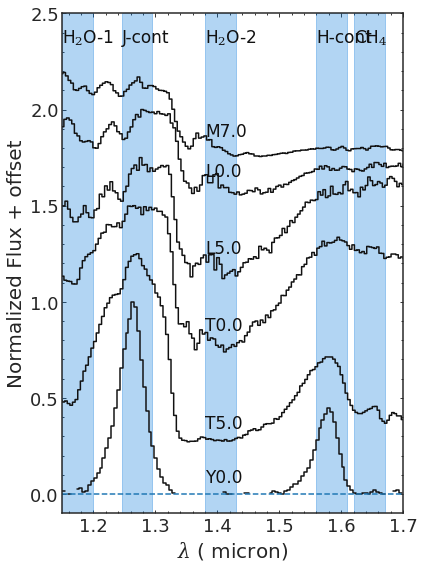

In [8]:
#spectral standards
#bands=[[1.246, 1.295],[1.15, 1.20], [1.62,1.67], [1.55, 1.60], [1.38, 1.43]]
bands=[[1.246, 1.295],[1.15, 1.20], [1.62,1.67], [1.56, 1.61], [1.38, 1.43]]
bandlabels=['J-cont', 'H$_2$O-1', 'CH$_4$', 'H-cont', 'H$_2$O-2']
st_spts=[splat.typeToNum(x) for x in np.flip([17, 20, 25, 30, 35, 40])]
standards=[splat.getStandard(x) for x in st_spts]


for s in standards: 
    s.normalize()
minima = 15.0
maxima = 40.0


fig, ax=plt.subplots(figsize=(6, 8))
#plt.style.use('dark_background')

for [idx, s], spt  in zip(enumerate(standards), st_spts):
    ax.step(s.wave.value, s.flux.value+idx/4, c='#111111')
    smrng=np.logical_and(s.wave.value>1.35, s.wave.value<=1.45)
    ax.text(1.38,  np.nanmedian(s.flux.value[smrng]+idx/4)+0.06, spt, {'fontsize':17}, color='#111111')

for wrng, wlabel in zip(bands,  bandlabels):
    rect=patches.Rectangle((wrng[0], -0.1), wrng[1]-wrng[0], 2.6, angle=0.0, color='#0074D9', alpha=0.3)
    ax.add_patch(rect)
    ax.text(wrng[0],2.35,wlabel, {'fontsize':17}, color='#111111')
    
ax.set_xlabel(r'$\lambda$ ( micron)', fontsize=20)
ax.set_ylabel(r'Normalized Flux + offset', fontsize=20)
ax.set_xlim([1.15, 1.7])
ax.set_ylim([-0.1, 2.5])
ax.axhline(0, linestyle='--')

plt.minorticks_on()
plt.tight_layout()
plt.savefig(wisps.OUTPUT_FIGURES+'/standards.pdf',  \
            bbox_inches='tight',  facecolor='white', transparent=False)

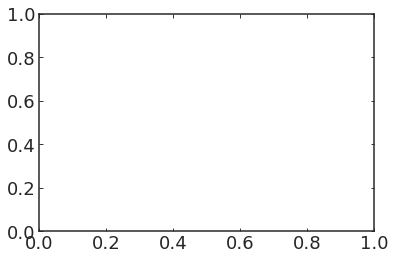

In [9]:
#show the data 
fig, ax=plt.subplots()

In [10]:
jhknkl

NameError: name 'jhknkl' is not defined

spex sample

In [ ]:
d=wisps.datasets['spex']

In [ ]:
d2=wisps.datasets['schneider']

In [ ]:
d3=wisps.datasets['manjavacas']

In [ ]:
d['snrj']=d.snr1.apply(np.log10)
d2['snrj']=d2.snr1.apply(np.log10)
d3['snrj']=d3.snr1.apply(np.log10)

In [ ]:
#d2=d.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()

In [ ]:
#d=d[d.spt>=17.]

In [ ]:
#ds=d[d['metallicity_cls']=='d/sd']

In [ ]:
#d2

In [ ]:
#len(spex_data)

Filters

In [ ]:
import splat.photometry as sphot
t0=splat.Spectrum(splat.STDS_DWARF_SPEX_KEYS['T0.0'])

In [ ]:
f140=sphot.filterProfile('WFC3 F140W')

In [ ]:
f160=sphot.filterProfile('WFC3 F160W')
f110=sphot.filterProfile('WFC3 F110W')
j_filt=sphot.filterProfile('2MASS J')
h_filt=sphot.filterProfile('2MASS H')

In [ ]:
t0.scale(np.nanmax(f140[1]))

In [ ]:
t0.shortname

In [ ]:
cmap=plt.cm.viridis

In [ ]:
l5std=splat.getSpectrum(spt=25, young=False, snr=100, vlm=True)[0]

In [ ]:

t5std=splat.getStandard(35)
l5std.normalize()
t5std.normalize()

In [ ]:
(f140[1]).max()

In [ ]:
fig, ax=plt.subplots(figsize=(10, 6))

#2mass
ax.plot( j_filt[0], j_filt[1]/((j_filt[1]).max()), alpha=1., color='#AAAAAA',linewidth=5)
ax.plot( h_filt[0], h_filt[1]/((h_filt[1]).max()), alpha=1., color='#AAAAAA',linewidth=5)

#wfc3
ax.fill_between(f110[0], f110[1]*(1/(f110[1]).max()), 0, alpha=0.1, color='#0074D9')
ax.fill_between( f140[0], f140[1]*(1/(f140[1]).max()), 0, alpha=0.1, color='#FF851B')
ax.fill_between( f160[0], f160[1]*(1/(f160[1]).max()), 0, alpha=0.1, color='#FF4136')



ax.plot(l5std.wave, l5std.flux,  c='#111111')
ax.plot(t5std.wave, t5std.flux,  c='#111111')

ax.text(1.0, 0.1, 'F110W', {'fontsize':18} )
ax.text(1.2, 1.0, 'J', {'fontsize':18} )
ax.text(1.4, 0.1, 'F140W', {'fontsize':18} )
ax.text(1.6, 0.1, 'F160W', {'fontsize':18} )
ax.text(1.75, 1.0, 'H', {'fontsize':18} )


ax.set_xlim([0.8, 2.0])
ax.set_ylim([-0.0, 1.1])
ax.set_xlabel(r'$\lambda$ ( micron)', fontsize=18)
ax.set_ylabel(r'Normalized Flux', fontsize=18)
plt.minorticks_on()
plt.tight_layout()
plt.savefig(wisps.OUTPUT_FIGURES+'/filter_profiles.pdf', bbox_inches='tight')

Sky positions 

In [ ]:
t=pd.read_csv(wisps.OUTPUT_FILES+'/observation_log.csv').drop_duplicates(subset='POINTING')

In [ ]:
#t

In [ ]:
t_wisp=t[t.POINTING.str.contains('par*')]
t_hst3d=t[t.POINTING.str.contains('pa*').apply(lambda x: not x)]

In [ ]:
#t_hst3d

This is an illustration of the modified snr

In [ ]:
sp=wisps.Spectrum(filename='par32-00079')
sp=sp.splat_spectrum
sp.normalize()
#flag=sp.isEmpty()
snr1=np.array(sp.flux/sp.noise)
snr=snr1[~np.isnan(snr1)]
xgrid=np.linspace(np.nanmin(snr), np.nanmax(snr), len(sp.wave))
cdf=wisps.kde_statsmodels_m(snr, xgrid)

In [ ]:
#sp1=wisps.Source(name='aegis-03-G141_17053')
#sp2=wisps.Source(name='Par32_BEAM_79A')

In [ ]:
sp1=wisps.Source(name='goodss-01-G141_45889')
sp2=wisps.Source(name='goodsn-24-G141_21552')

In [ ]:
sp1.normalize(wrange=[1.1, 1.65])
sp2.normalize(wrange=[1.1, 1.65])

In [ ]:
std1=splat.getStandard(sp1.spectral_type)

In [ ]:
std2=splat.getStandard(sp2.spectral_type)

In [ ]:
std1.normalize(), std2.normalize()

In [ ]:
fig, (ax2, ax1)=plt.subplots(1, 2, figsize=(10,4), sharex=False, sharey=True)


ax1.step(sp1.wave, sp1.flux*5.55, c='#111111')
ax1.step(std1.wave, std1.flux, c='#01FF70')

ax1.plot(sp1.wave, (sp1.flux*sp1.sensitivity_curve)/(sp1.flux*sp1.sensitivity_curve).max(), c='#0074D9')
ax1.set_title(sp1.shortname.upper(), fontsize=18)


ax2.step(sp2.wave, sp2.flux*5.5, c='#111111')
ax2.step(std2.wave, std2.flux, c='#01FF70')
a2=ax2.step(sp2.wave, (sp2.flux*sp2.sensitivity_curve)/(sp2.flux*sp2.sensitivity_curve).max(), c='#0074D9')


ax1.fill_between(sp1.wave, sp1.sensitivity_curve/sp1.sensitivity_curve.max(), 1., alpha=0.5,  color='#DDDDDD')
ax2.fill_between(sp2.wave, sp2.sensitivity_curve/sp2.sensitivity_curve.max(), 1., alpha=0.5,  color='#DDDDDD')

ax2.set_title(sp2.shortname.upper(), fontsize=18)

for a in [ax1, ax2]:
    a.set_xlim([1.1, 1.7])
    a.set_xlabel(r'$\lambda$ ( micron)', fontsize=18)
    a.set_ylabel(r'Normalized Flux', fontsize=18)
    a.set_ylim([0., 1.05])


#plt.legend( ['Spectrum/Sensitivity', 'Sensitivity', 'Spectrum'], bbox_to_anchor=(0.3, 0.5), fontsize=18)
#ax2.legend(['spectrum/sensitivity', 'sensitivity', 'spectrum'], loc='best')
#plt.tight_layout()

plt.show()
fig.savefig(wisps.OUTPUT_FIGURES+'/sensitivity_illustration.pdf', bbox_inches='tight', fontsize=16)


In [ ]:
import pymc3 as pm